In [62]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
#Read training data file
trainfile = '/content/drive/MyDrive/Santander Customer Satisfaction - TRAIN.csv'
trainData = pd.read_csv(trainfile)

#Read test data file
testfile = '/content/drive/MyDrive/Santander Customer Satisfaction - TEST-Without TARGET.csv'
testData = pd.read_csv(testfile)

In [64]:
trainData.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [3]:
print(trainData.shape)
print(testData.shape)

(76020, 371)
(75818, 370)


In [65]:
#Understanding the Columns
trainData.info()
print("=======")
# To check basic statistics of a data set, column wise
trainData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [66]:
print(trainData.dtypes)
print(trainData.isnull().sum())

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object
ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64


In [5]:
# Split dataset
Xtrain = trainData.drop("TARGET", axis=1)
Ytrain = trainData["TARGET"]
print(Ytrain.value_counts())


0    73012
1     3008
Name: TARGET, dtype: int64


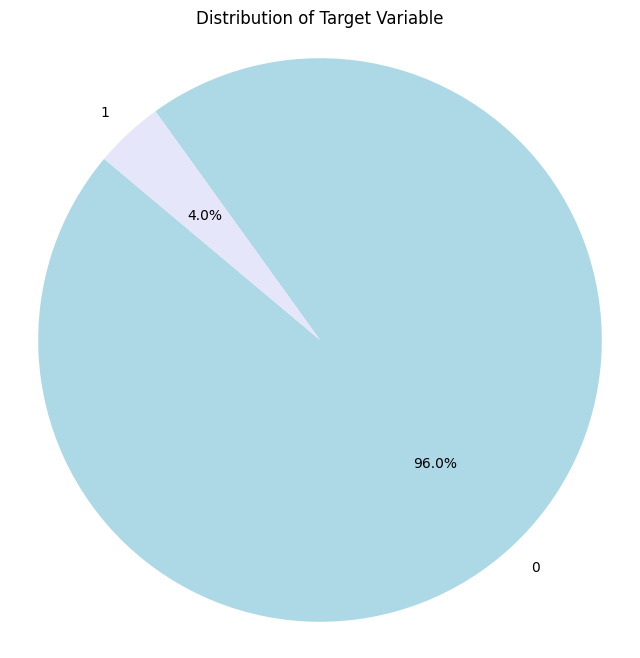

In [61]:
target_counts = Ytrain.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=['#add8e6','#e6e6fa'])
plt.axis('equal')
plt.title('Distribution of Target Variable')
plt.show()

In [6]:
smote = SMOTE(random_state=28)
x_res, y_res = smote.fit_resample(Xtrain, Ytrain)
print(y_res.value_counts())


0    73012
1    73012
Name: TARGET, dtype: int64


In [92]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 15, max_features = 50, max_leaf_nodes = 50, class_weight = "balanced")
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = .20, random_state = 7)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

test_pred = dt.predict(testData)
submission = pd.DataFrame({'ID': testData['ID'], 'TARGET': test_pred})
submission.to_csv('ModelDT.csv', index=False)

Accuracy: 0.6710076295711654
Precision: 0.08088653154006441
Recall: 0.7400346620450606
F1 Score: 0.14583333333333334
ROC-AUC Score: 0.7041596705316573
Confusion Matrix:
 [[9775 4852]
 [ 150  427]]


In [78]:
dt = DecisionTreeClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size = .20, random_state = 7)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

test_pred = dt.predict(testData)
submission = pd.DataFrame({'ID': testData['ID'], 'TARGET': test_pred})
submission.to_csv('ModelDT2.csv', index=False)

Accuracy: 0.9470638589282657
Precision: 0.9364494743186231
Recall: 0.9590563061518415
F1 Score: 0.9476180795554652
ROC-AUC Score: 0.9470814900562271
Confusion Matrix:
 [[13675   949]
 [  597 13984]]


In [79]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 15, max_features = "auto", max_leaf_nodes=50)
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size = .20, random_state = 7)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

test_pred = dt.predict(testData)
submission = pd.DataFrame({'ID': testData['ID'], 'TARGET': test_pred})
submission.to_csv('ModelDT3.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Accuracy: 0.8355418592706728
Precision: 0.8150940964166022
Recall: 0.8673616350044578
F1 Score: 0.840415988304482
ROC-AUC Score: 0.8355886402593404
Confusion Matrix:
 [[11755  2869]
 [ 1934 12647]]


In [80]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split = 2)
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size = .20, random_state = 7)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

test_pred = dt.predict(testData)
submission = pd.DataFrame({'ID': testData['ID'], 'TARGET': test_pred})
submission.to_csv('ModelDT4.csv', index=False)

Accuracy: 0.9507276151343947
Precision: 0.939708244111349
Recall: 0.9631026678554283
F1 Score: 0.9512616426756986
ROC-AUC Score: 0.9507458087636005
Confusion Matrix:
 [[13723   901]
 [  538 14043]]


In [81]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_features = 20, max_leaf_nodes = 50)
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size = .20, random_state = 7)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

test_pred = dt.predict(testData)
submission = pd.DataFrame({'ID': testData['ID'], 'TARGET': test_pred})
submission.to_csv('ModelDT5.csv', index=False)

Accuracy: 0.8085944187639102
Precision: 0.7774143782783092
Recall: 0.8640010973184281
F1 Score: 0.8184239589423763
ROC-AUC Score: 0.8086758768867852
Confusion Matrix:
 [[11017  3607]
 [ 1983 12598]]


In [82]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 2, max_features = 3, max_leaf_nodes = 10)
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size = .20, random_state = 7)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

test_pred = dt.predict(testData)
submission = pd.DataFrame({'ID': testData['ID'], 'TARGET': test_pred})
submission.to_csv('ModelDT6.csv', index=False)

Accuracy: 0.5672658791302859
Precision: 0.5390333078870183
Recall: 0.9201015019545985
F1 Score: 0.6798074486952115
ROC-AUC Score: 0.5677846131217195
Confusion Matrix:
 [[ 3151 11473]
 [ 1165 13416]]


In [83]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 15, max_features = 40, max_leaf_nodes = 50)
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size = .20, random_state = 7)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

test_pred = dt.predict(testData)
submission = pd.DataFrame({'ID': testData['ID'], 'TARGET': test_pred})
submission.to_csv('ModelDT7.csv', index=False)

Accuracy: 0.8758774182502996
Precision: 0.8905047048759623
Recall: 0.8567313627323229
F1 Score: 0.8732916215177041
ROC-AUC Score: 0.8758492699876056
Confusion Matrix:
 [[13088  1536]
 [ 2089 12492]]


In [84]:
dt = RandomForestClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size = .20, random_state = 7)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

test_pred = dt.predict(testData)
submission = pd.DataFrame({'ID': testData['ID'], 'TARGET': test_pred})
submission.to_csv('ModelRF.csv', index=False)

Accuracy: 0.965040232836843
Precision: 0.9641927974804875
Recall: 0.9658459639256567
F1 Score: 0.9650186726967487
ROC-AUC Score: 0.965041417411406
Confusion Matrix:
 [[14101   523]
 [  498 14083]]


In [85]:
dt = GradientBoostingClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size = .20, random_state = 7)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
#Model Accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

test_pred = dt.predict(testData)
submission = pd.DataFrame({'ID': testData['ID'], 'TARGET': test_pred})
submission.to_csv('ModelGB.csv', index=False)

Accuracy: 0.9202876219825372
Precision: 0.9070493654906651
Recall: 0.9362869487689459
F1 Score: 0.9214362850971922
ROC-AUC Score: 0.920311143968718
Confusion Matrix:
 [[13225  1399]
 [  929 13652]]


In [52]:

param_grid = {
    'max_depth': [15, 20],
    'max_features' : [45, 50, 55, "sqrt"],
    'max_leaf_nodes' : [45, 50, 55],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=7), param_grid, scoring=make_scorer(f1_score),  # use F1 score here
    cv=5,  # number of folds for cross-validation
    n_jobs=-1,  # use all CPU cores
    verbose=5 )
grid_search.fit(x_res, y_res)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 15, 'max_features': 50, 'max_leaf_nodes': 50}
Best Score: 0.8640692065405882
